### Pomocniczne funkcje:
1. Konwersja do łańcucha bitów
2. Operacje XOR, AND, OR, NEG, + (AddBitStrings) dla łańcuchów bitów 
3. Przesunięcia i przesunięcia z rotacją 

In [ ]:
# Funkcje pomocnicze 
from textwrap import wrap
import math 
from codecs import encode

#tablica znaków w tablicę kodów int
def intoIntArray(message: str):
    int_array = []
    mesg_array = list(message) 
    for i in mesg_array:
        int_array.append(ord(i))
    return int_array

# jak wyświetlić dane w postaci binarnej 
get_bin = lambda x, n: format(x, 'b').zfill(n)

def printBinary(data: []):
    for i in data:
        print(get_bin(i,8), end=' ')

def intListToBinStr(message_list):
    binary = []
    for x in message_list: 
        binary.append(get_bin(x, 8))
    binary_str = ""
    for x in binary:
        binary_str+=x 
    return binary_str

# Python3 program for above approach 
# adds the two-bit strings and return the result 
# Helper method: given two unequal sized bit strings, 
# converts them to same length by adding leading 0s 
# in the smaller string. Returns the the new length 
def makeEqualLength(str1, str2): 
    len1 = len(str1) # Length of string 1 
    len2 = len(str2) # length of string 2 
    if len1 < len2: 
        str1 = (len2 - len1) * '0' + str1 
        len1 = len2 
    elif len2 < len1: 
        str2 = (len1 - len2) * '0' + str2 
    len2 = len1 
    return len1, str1, str2 

def addBitStrings( first, second ): 
    result = '' # To store the sum bits 
    # make the lengths same before adding 
    length, first, second = makeEqualLength(first, second) 
    carry = 0 # initialize carry as 0 

    # Add all bits one by one 
    for i in range(length - 1, -1, -1): 
        firstBit = int(first[i]) 
        secondBit = int(second[i]) 
        # boolean expression for sum of 3 bits 
        sum = (firstBit ^ secondBit ^ carry) + 48
        result = chr(sum) + result 
        # boolean expression for 3 bits addition 
        carry = (firstBit & secondBit) | (secondBit & carry) | (firstBit & carry) 

    # if overflow, then add a leading 1 
    if carry == 1:
        result = result
        #result = '1' + result 
    return result 

def XOR(bits1,bits2):
    """perform a XOR operation and return the output"""
    xor_result = ""
    for index in range(len(bits1)):
        if bits1[index] == bits2[index]: 
            xor_result += '0'
        else:
            xor_result += '1'
    return xor_result  

def AND(bits1,bits2):
    """perform a XOR operation and return the output"""
    and_result = ""
    for index in range(len(bits1)):
        if (bits1[index] == '1') and  (bits2[index] == '1'): 
            and_result += '1'
        else:
            and_result += '0'
    return and_result  

def OR(bits1,bits2):
    """perform a XOR operation and return the output"""
    or_result = ""
    for index in range(len(bits1)):
        if (bits1[index] == '0') and  (bits2[index] == '0'): 
            or_result += '0'
        else:
            or_result += '1'
    return or_result  

def NEG(bits):
    """perform a XOR operation and return the output"""
    neg_result = ""
    for index in range(len(bits)):
        if (bits[index] == '0'): 
            neg_result += '1'
        else:
            neg_result += '0'
    return neg_result  

def circular_left_shift(x,c):
     shiftedbits = x[c:] + x[:c]
     return shiftedbits

def circular_right_shift(x,c):
     shiftedbits = x[-c:] + x[:-c] 
     return shiftedbits

def left_shift(x,c):
     zeros=''
     for i in range(c):
         zeros+='0'
     shiftedbits = x[c:] + zeros
     return shiftedbits

def right_shift(x,c):
     zeros=''
     for i in range(c):
         zeros+='0'
     shiftedbits = zeros+x[:-c]
     return shiftedbits
 
    
print(AND('0101010001101', '0101010001100'))    
print(OR('0101010001101', '0101010001100')) 
print(XOR('0101010001101', '0101010001100')) 
print(NEG('0101010001101')) 

str1 = '011'
str2 = '110'
print('Sum is', addBitStrings(str1, str2)) 

l = 1416127776
bl = get_bin(l,32)
print(bl)
for i in range(32):
    print(left_shift(bl,i))
    

# Funkcje skrótu (ang. *digest functions*)

Funkcja skrótu dla danej wiadomości o dowolnej długości wylicza wiadomość o ustalonej długości zwaną skrótem (ang. *digest*), która powinna jednoznacznie identyfikować wejściową wiadomość.

Głównym zastosowanie funkcji skrótu jest weryfikacja *integralności* danych. Integralnością danych nazywamy własność wynikającą  z faktu, że dane nie zostały zmienione w sposób nieautoryzowany. Funkcja skrótu odgrywa także kluczową rolę w podpisie cyfrowym. W miejsce szyfrowania (kluczem prywatnym) całej wiadomości używamy jedynie skrótu tej wiadomości.   

Aby spełniać swoją rolę funkcja skrótu musi posiadać następujące własności:
1. Odporność na przeciwobraz (jednokierunkowość): dysponując skrótem $H$ nie można odtworzyć wiadomości $M$ takiej, że $H=digest(M)$. 

2. Odporność na drugi (wtórny) przeciwobraz (słaba bezkonfliktowość): dysponując wiadomością $M_1$ nie można znaleźć wiadomości $M_2$ takiej, że $digest(M_1) = digest(M_2)$ 

3. Odporność na kolizje (silna bezkonfliktowość): nie jest możliwe generowanie par $M_1$, $M_2$ takich, że $digest(M_1) = digest(M_2)$ 

Z oczywistych względów kolizje istnieją zawsze - mapujemy ogromną (potencjalnie nieskończoną) przestrzeń wiadomości na skończoną przetrzeń skrótów, zależną od wyjściowego rozmiaru skrótu. **To co nam wystarcza to obliczeniowa niemożność znalezienia kolizji.**  


## Struktura Damgarda-Merkla 
Struktura Damgarda-Merkla pozwala wyznaczać skrót dla wiadomości o dowolnym rozmiarze. Wiadomość dzielona jest na porcje, które kolejno poddawne są tzw. funkcji kompresującej. Oprócz wiadomości wejściem dla funkcji kompresującej jest wektor zmiennych o łącznej długości takiej jak wynikowy skrót. Początkowa wartość tych zmiennych jest znana w specyfikacji funkcji. W trakcie przetwarzania zmienne te kaskadowo przekazywane są między kolejnymi wywołaniami funkcji kompresującej, a ostatnie wartości tych zmiennych stanowią skrót wiadomości. 
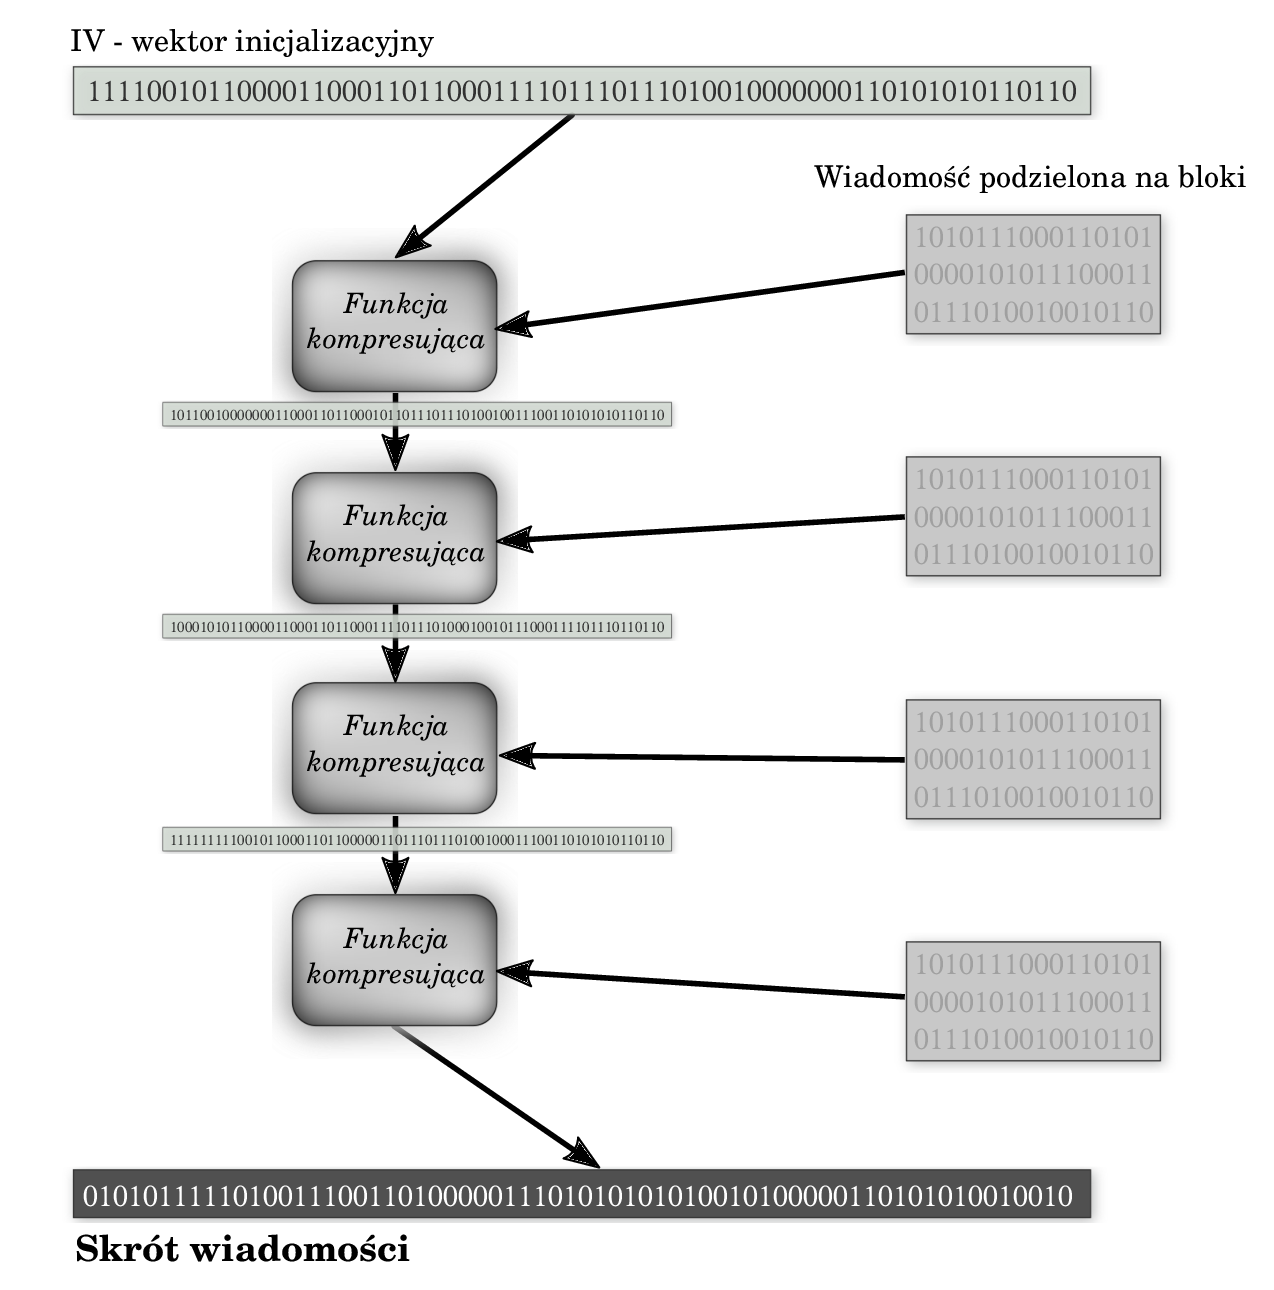

# Implementacja funkcji SHA-2 (256)

### Dopełnienie
Wiadomość zanim zostanie poddana przetwarzaniu musi zostać dopełniona tak by była ona wielokrotnością 64 bajtów. Jednocześnie dopełnienie musi być tak skonstruowane aby nie obniżyć bezpieczeństwa funkcji. 
Schemat dopełnienia:
1. Wyznacz długość w bitach (zazwyczaj ilość bajtów x 8) i zapamiętaj
2. Dodaj bit '1' do wiadomości 
3. Dodaj tyle '0' aby reszta z dzielenia długości wiadomości przez 512 wynosiła 448 (wiadomość ma składać się z bloków 512 bitowych i ostatniego 448-bitowego)
4. Dodaj na końcu 64 bitowy blok zawierający długość orygnalnej wiadomości (punkt 1)

In [ ]:
def bitpadding(arg, byte_length):
       # Wstaw swój kod tutaj 
    return arg


string = 'The quick brown fox jumps over the lazy dog'
listint = intoIntArray(string)
print(len(listint))
print(listint)
binary_str = intListToBinStr(listint) 
print(len(binary_str), binary_str)
print()

paddedMessage = bitpadding(binary_str,43)
print(paddedMessage)
print(len(paddedMessage))

message_blocks = wrap(paddedMessage, 512)
for x in message_blocks:
    print(x)
    
blocks32bits = wrap(paddedMessage, 32)
print()
for x in blocks32bits:
    print(x)
print()

'''
Referencyjna postać dopełnionej wiadomości (w 32-bitowych kawałkach ):
01010100011010000110010100100000
01110001011101010110100101100011
01101011001000000110001001110010
01101111011101110110111000100000
01100110011011110111100000100000
01101010011101010110110101110000
01110011001000000110111101110110
01100101011100100010000001110100
01101000011001010010000001101100
01100001011110100111100100100000
01100100011011110110011110000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000101011000
'''

### Powielenie wiadomości 
512 bitowa porcja dzielona jest na szesnaście 32-bitowych porcji. SHA256 wewnątrz funkcji kompresującej wykonuje 64 powtórzenia funkcji rundy zatem konieczne jest wygenerowanie brakujących 48 porcji: 

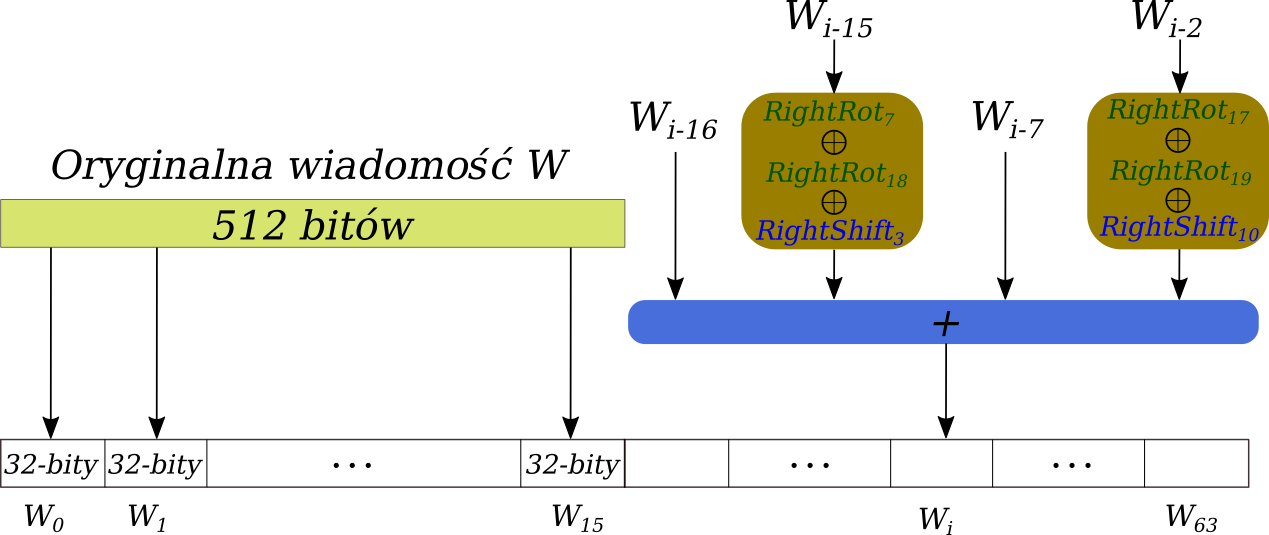


In [ ]:
def formchunk(chunk):
    original_blocks = wrap(chunk, 32)
    # dodaj swój kod tutaj 
   
    return original_blocks
        

tmp = formchunk(paddedMessage)
for x in tmp:
    print(x)
    

In [ ]:
Ostatnie 5 32-bitowych porcji rozszerzonego bloku (dla porównania)
... 
00100110100010111111010011011100
10111001000101100101100011000101
11100000111001110010001010111001
10001011010000011011111010100010
11100111111011110110000110010111   

### Funkcja rundy SHA256
Każdy 32 bitowy kawałek rozszerzonej wiadomości jest przetwarzany przez funkcję rundy (razem 64 iteracje). W każdej rundzie dodawana jest inna stała $k_i$. Oprócz porcji danych (i stałej) wejściem do funkcji rundy jest 8 zmiennych $a...h$, które przechowują częściowe wyniki skracania. Wartości te wyliczone dla poprzedniej porcji są wejściem dla przetworzenia następnej porcji.  

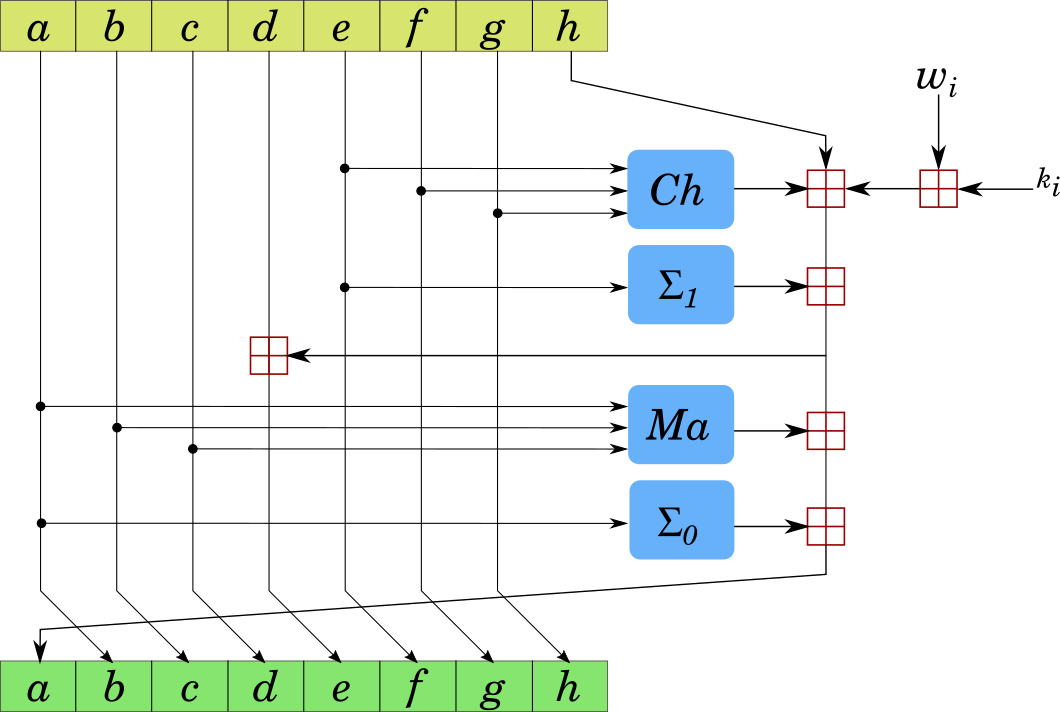

1. Ch: $(e \wedge f) \oplus (\neg e \wedge g)$ 
2. Ma: $(a \wedge b) \oplus (a \wedge c)  \oplus (b \wedge c)$
3. $\sum_0$: $a\ggg 2 \wedge a\ggg 13 \wedge a\ggg 22$ (circular_rigth_shift)
4. $\sum_1$: $e\ggg 6 \wedge e\ggg 11 \wedge e\ggg 25$ (circular_right_shift)

In [ ]:
# (pierwsze 32 bity ułamkowej części pierwiastka kwadratowego 8 liczb pierwszych 2..19):
h0 = 0x6a09e667
h1 = 0xbb67ae85
h2 = 0x3c6ef372
h3 = 0xa54ff53a
h4 = 0x510e527f
h5 = 0x9b05688c
h6 = 0x1f83d9ab
h7 = 0x5be0cd19

k = [0x428a2f98, 0x71374491, 0xb5c0fbcf, 0xe9b5dba5, 0x3956c25b, 0x59f111f1, 0x923f82a4, 0xab1c5ed5,
     0xd807aa98, 0x12835b01, 0x243185be, 0x550c7dc3, 0x72be5d74, 0x80deb1fe, 0x9bdc06a7, 0xc19bf174,
     0xe49b69c1, 0xefbe4786, 0x0fc19dc6, 0x240ca1cc, 0x2de92c6f, 0x4a7484aa, 0x5cb0a9dc, 0x76f988da,
     0x983e5152, 0xa831c66d, 0xb00327c8, 0xbf597fc7, 0xc6e00bf3, 0xd5a79147, 0x06ca6351, 0x14292967,
     0x27b70a85, 0x2e1b2138, 0x4d2c6dfc, 0x53380d13, 0x650a7354, 0x766a0abb, 0x81c2c92e, 0x92722c85,
     0xa2bfe8a1, 0xa81a664b, 0xc24b8b70, 0xc76c51a3, 0xd192e819, 0xd6990624, 0xf40e3585, 0x106aa070,
     0x19a4c116, 0x1e376c08, 0x2748774c, 0x34b0bcb5, 0x391c0cb3, 0x4ed8aa4a, 0x5b9cca4f, 0x682e6ff3,
     0x748f82ee, 0x78a5636f, 0x84c87814, 0x8cc70208, 0x90befffa, 0xa4506ceb, 0xbef9a3f7, 0xc67178f2]    

hb0 = get_bin(int(h0),32)
hb1 = get_bin(int(h1),32)
hb2 = get_bin(int(h2),32)
hb3 = get_bin(int(h3),32)
hb4 = get_bin(int(h4),32)
hb5 = get_bin(int(h5),32)
hb6 = get_bin(int(h6),32)
hb7 = get_bin(int(h7),32)


# kod funkcji jest kompletny! 
def sha2round(p, ki, a, b, c, d, e, f, g, h):
    #print(a, b, c, d, e, f, g, h )
    S1 = XOR(XOR(circular_right_shift(e, 6), circular_right_shift(e, 11)), circular_right_shift(e, 25))
 
    CH = XOR(AND(e,f), AND(NEG(e),g))
 
    hs1 = addBitStrings(h, S1)
    chki = addBitStrings(CH, ki)
    hs1_chki = addBitStrings(hs1, chki)
    
    temp1 = addBitStrings(hs1_chki, p)
   
    
    S0 = XOR(XOR(circular_right_shift(a, 2), circular_right_shift(a, 13)), circular_right_shift(a, 22))
    MA =  XOR(XOR(AND(a,b), AND(a,c)), AND(b,c))
    
    temp2 = addBitStrings(S0, MA)
    
    new_a = addBitStrings(temp1,temp2)
    new_e = addBitStrings(d, temp1)
    
    return new_a, a, b, c, new_e, e, f, g


a, b, c, d, e, f, g, h = sha2round(tmp[0], get_bin(int(k[0]),32), hb0, hb1, hb2, hb3, hb4, hb5, hb6, hb7 )

hb0 = addBitStrings(hb0, a)
hb1 = addBitStrings(hb1, b)
hb2 = addBitStrings(hb2, c)
hb3 = addBitStrings(hb3, d)
hb4 = addBitStrings(hb4, e)
hb5 = addBitStrings(hb5, f)
hb6 = addBitStrings(hb6, g)
hb7 = addBitStrings(hb7, h)

print(hb0, hb1, hb2, hb3, hb4, hb5, hb6, hb7)

## Kompletny algorytm funkcji skrótu SHA256
1. Dopełnij wiadomość 
2. Dla każdej 512 bitowej (64 bajtowej porcji) wykonuj:
    1. podziel na 16 32-bitowych porcji 
    2. wylicz 48 dodatkowych porcji (razem ma być 64 32-bitowe porcje)
    3. dla każdej porcji wykonaj rundę SHA256 (dodając stałą rundy)
    3. Wynik 64 rund dla porcji dodaje do zmiennych h0...h7
4. h0...h7 na końcu zawiera skrót całej wiadomości 

In [ ]:
# (pierwsze 32 bity ułamkowej części pierwiastka kwadratowego 8 liczb pierwszych 2..19):
h0 = 0x6a09e667
h1 = 0xbb67ae85
h2 = 0x3c6ef372
h3 = 0xa54ff53a
h4 = 0x510e527f
h5 = 0x9b05688c
h6 = 0x1f83d9ab
h7 = 0x5be0cd19
# Stałe rundy 
# (pierwsze 32 bity ułamkowej części pierwiastka kwadratowego 64 liczb pierwszych 2..311):
k = [0x428a2f98, 0x71374491, 0xb5c0fbcf, 0xe9b5dba5, 0x3956c25b, 0x59f111f1, 0x923f82a4, 0xab1c5ed5,
     0xd807aa98, 0x12835b01, 0x243185be, 0x550c7dc3, 0x72be5d74, 0x80deb1fe, 0x9bdc06a7, 0xc19bf174,
     0xe49b69c1, 0xefbe4786, 0x0fc19dc6, 0x240ca1cc, 0x2de92c6f, 0x4a7484aa, 0x5cb0a9dc, 0x76f988da,
     0x983e5152, 0xa831c66d, 0xb00327c8, 0xbf597fc7, 0xc6e00bf3, 0xd5a79147, 0x06ca6351, 0x14292967,
     0x27b70a85, 0x2e1b2138, 0x4d2c6dfc, 0x53380d13, 0x650a7354, 0x766a0abb, 0x81c2c92e, 0x92722c85,
     0xa2bfe8a1, 0xa81a664b, 0xc24b8b70, 0xc76c51a3, 0xd192e819, 0xd6990624, 0xf40e3585, 0x106aa070,
     0x19a4c116, 0x1e376c08, 0x2748774c, 0x34b0bcb5, 0x391c0cb3, 0x4ed8aa4a, 0x5b9cca4f, 0x682e6ff3,
     0x748f82ee, 0x78a5636f, 0x84c87814, 0x8cc70208, 0x90befffa, 0xa4506ceb, 0xbef9a3f7, 0xc67178f2
]    

def simpleSHA256(arg):
    hb0 = get_bin(int(h0),32)
    hb1 = get_bin(int(h1),32)
    hb2 = get_bin(int(h2),32)
    hb3 = get_bin(int(h3),32)
    hb4 = get_bin(int(h4),32)
    hb5 = get_bin(int(h5),32)
    hb6 = get_bin(int(h6),32)
    hb7 = get_bin(int(h7),32)
    messageInt = intoIntArray(arg)
    messageBinary = intListToBinStr(messageInt) 
    # dodaj swój kod tutaj!    
    
    

    return thb0, thb1, thb2, thb3, thb4, thb5, thb6, thb7 


H0, H1, H2, H3, H4, H5, H6, H7 = simpleSHA256("the quick brown fox jumps over the lazy dog")
hash_pieces = [H0, H1, H2, H3, H4, H5, H6, H7]
print(hash_pieces)

#### Referencyjna postać skrótu dla wiadomości
[h0, .... h7]

['00000101110001101110000010001111', '00011101100111111101101011111010', '00000011000101000111111111001011', '10001111100000101111000100100100', '11000111011011010010111101110000', '11100011110110011000100111011100', '10001010101011011011010111100111', '11010111010001010000101111101100']
